# HOUSE PRICE PREDICTION

# Import libraries and load the data

In [8]:
# -------------------------------------------
# Task 1: Data Analysis Report
# -------------------------------------------

# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


In [9]:
# Load the data
df = pd.read_csv("data.csv")

# Display first few rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis (EDA)
# Understand the data

In [10]:
print("Shape of Dataset:", df.shape)
print("\nDataset Info:\n")
df.info()


Shape of Dataset: (1460, 81)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Overall

# Statistical Summary

In [12]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Missing Values

In [13]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

# Missing Values Heatmap

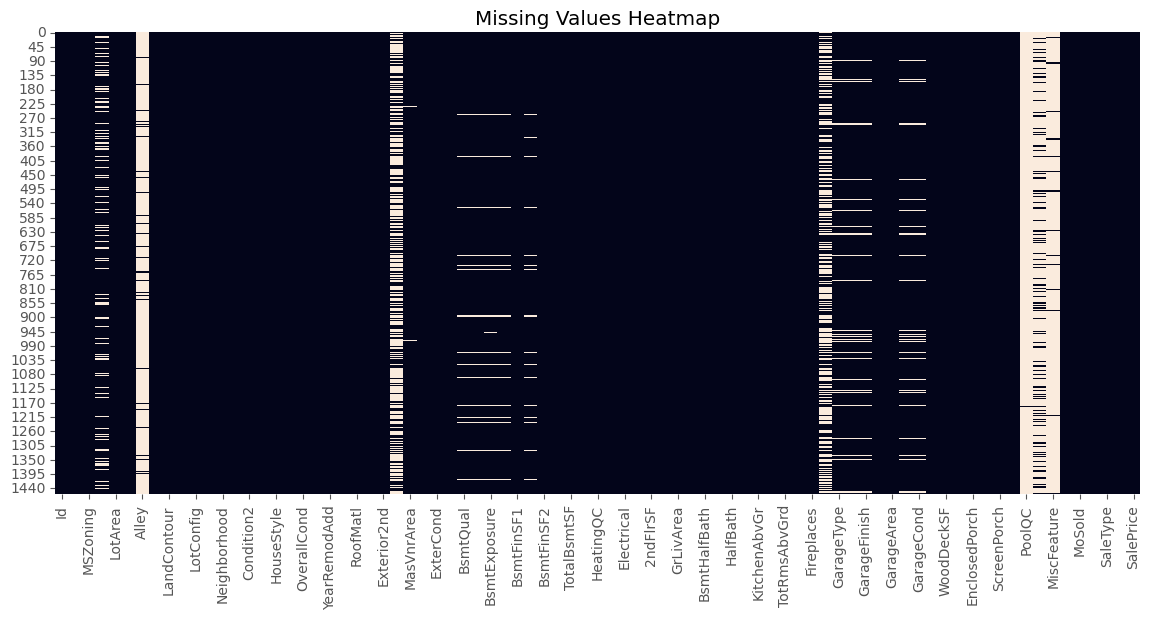

In [14]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


# Separating Numerical & Categorical Columns

In [15]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))


Numerical Columns: 38
Categorical Columns: 43


# Univariate Analysis
# Target Variable – SalePrice

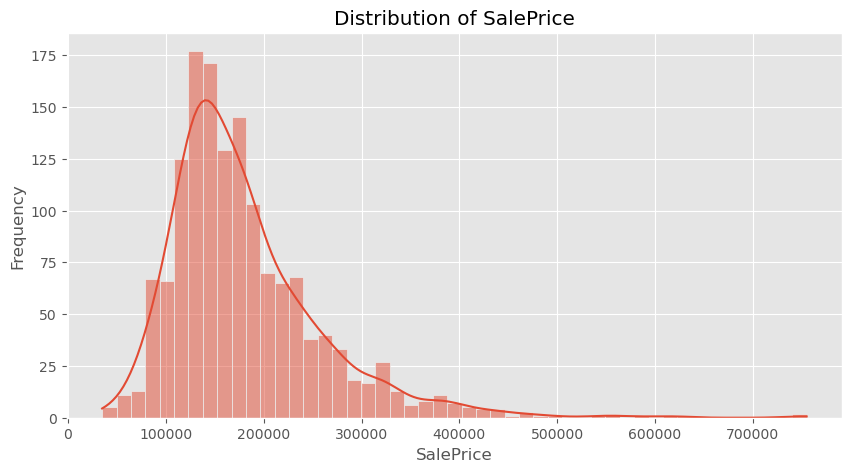

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


# Distribution of All Numerical Features

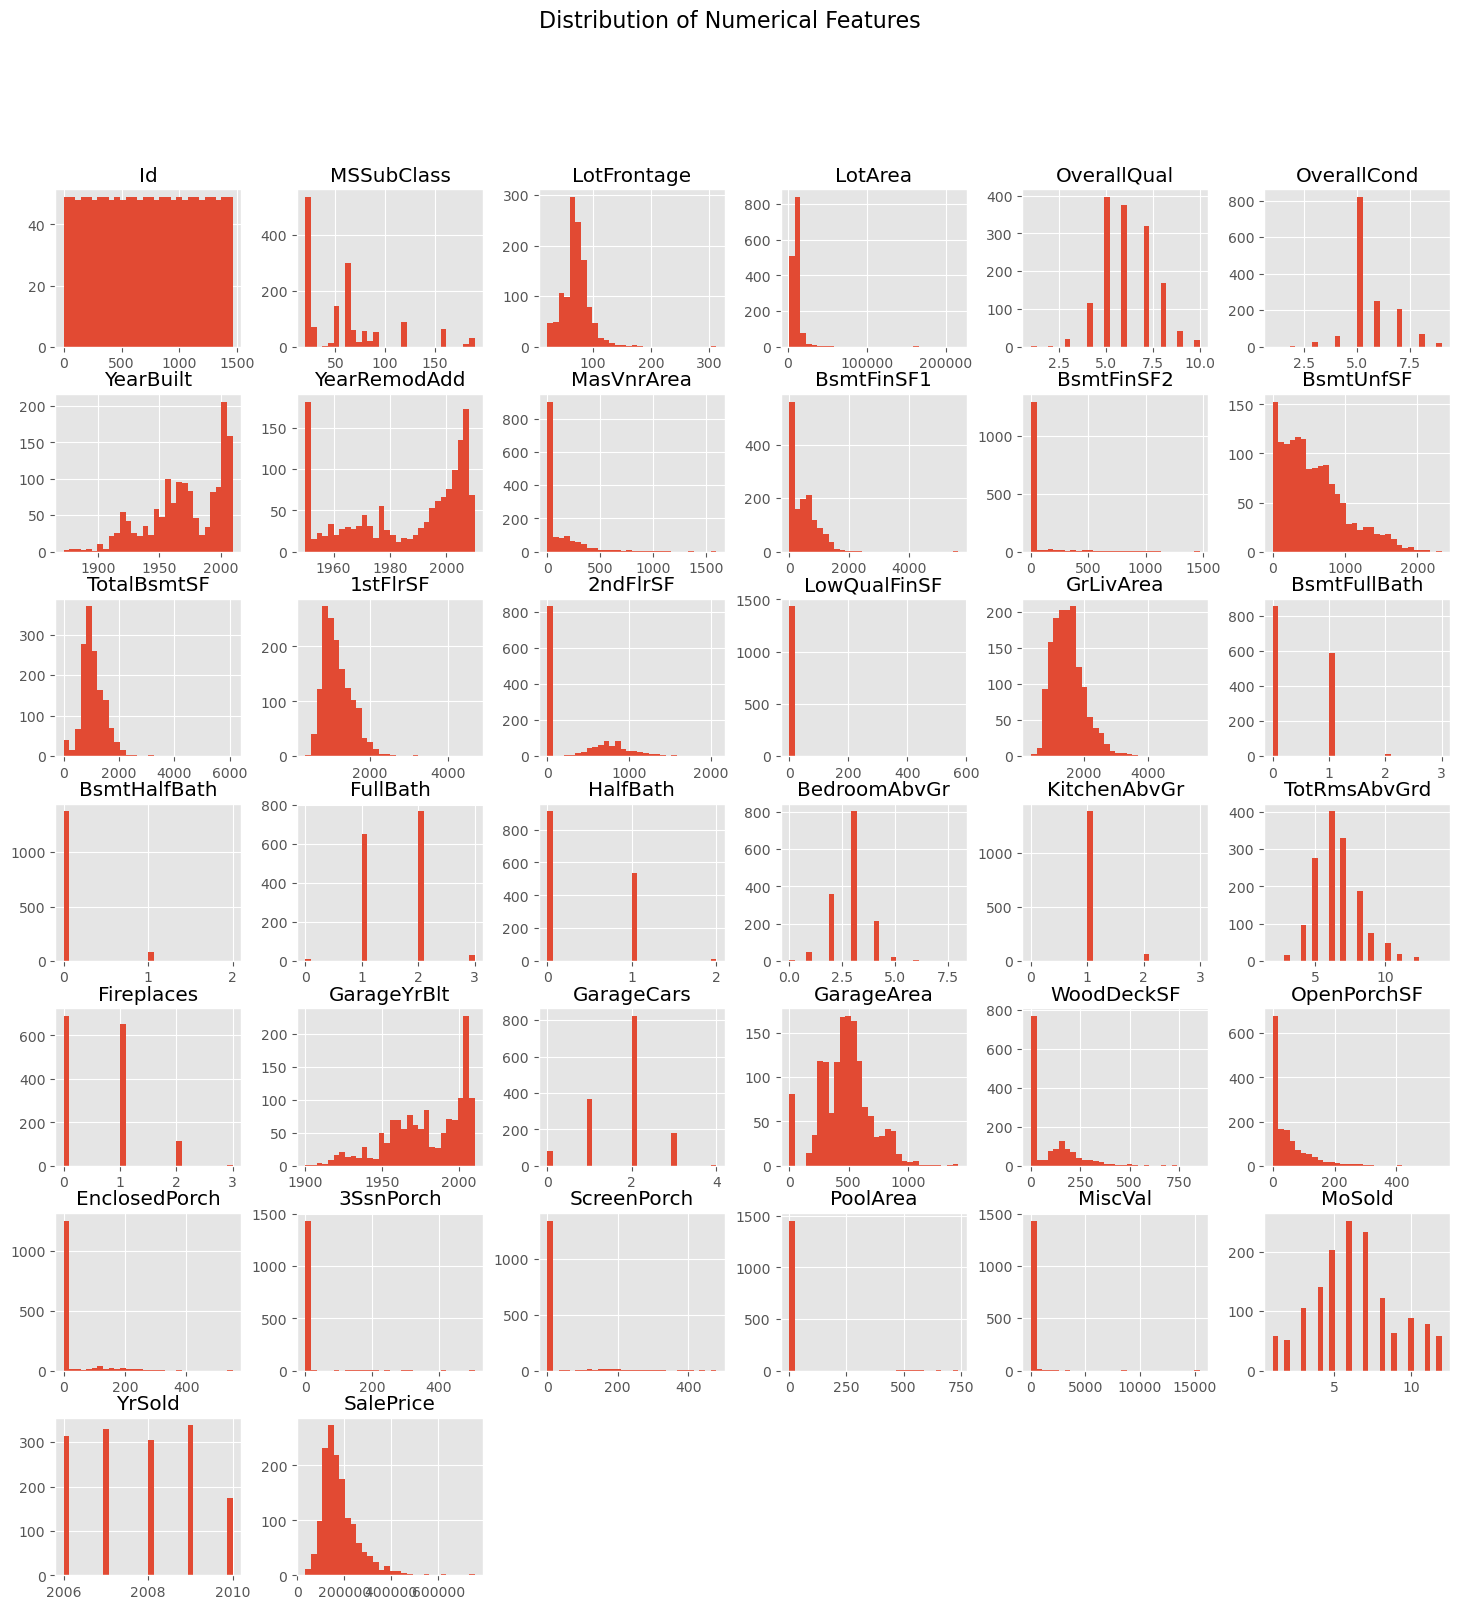

In [17]:
df[num_cols].hist(figsize=(18,18), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


# Categorical Features – Top 10 Example

In [18]:
for col in cat_cols[:10]:
    print(f"\nValue Counts for {col}")
    print(df[col].value_counts().head())



Value Counts for MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Value Counts for Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Value Counts for Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Value Counts for LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Value Counts for LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Value Counts for Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Value Counts for LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Value Counts for LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Value Counts for Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: count, dtyp

# Outlier Detection 
# Important numerical features

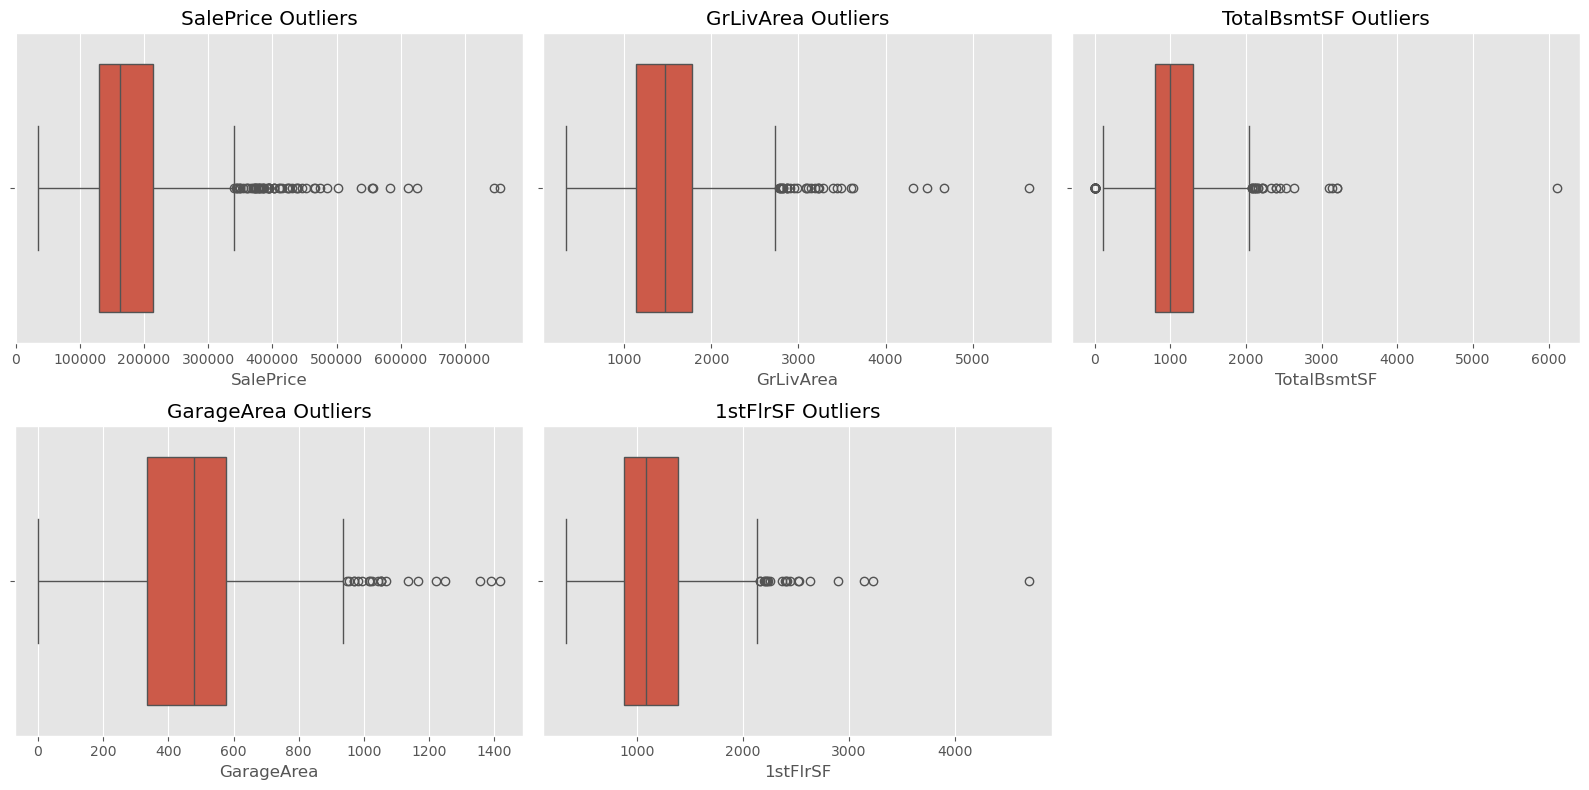

In [19]:
key_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']

plt.figure(figsize=(16,8))
for i, col in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Outliers")

plt.tight_layout()
plt.show()


# Correlation Analysis
# Correlation Heatmap

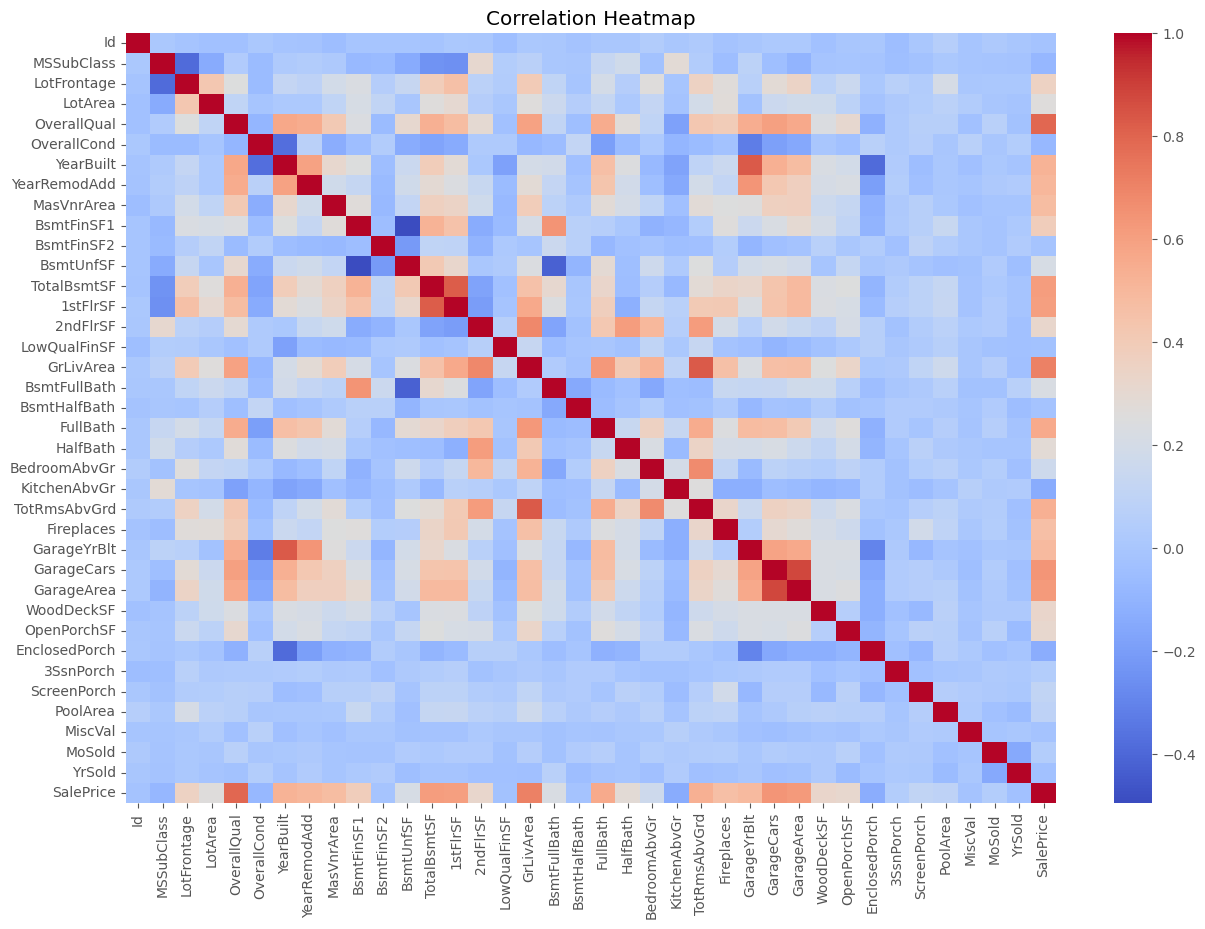

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# Bivariate Analysis
# GrLivArea vs SalePrice

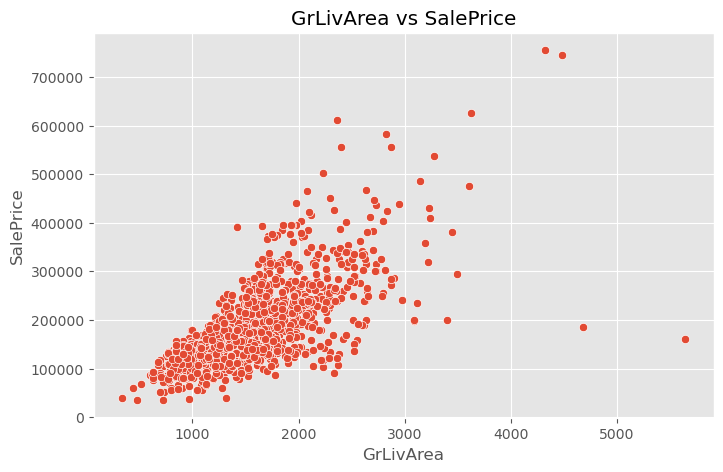

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("GrLivArea vs SalePrice")
plt.show()


# OverallQual vs SalePrice

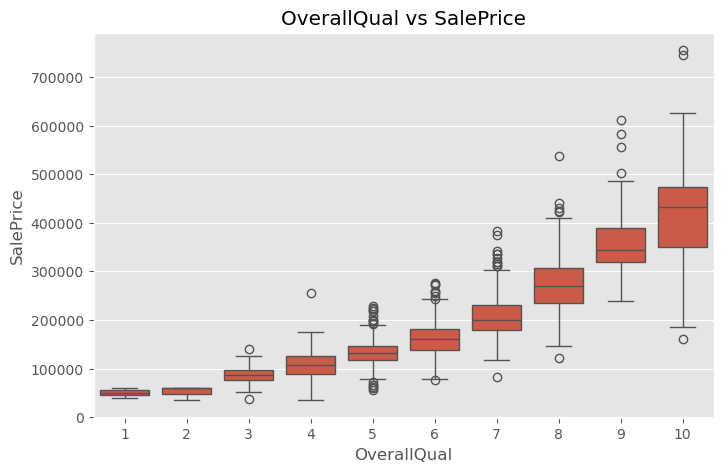

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("OverallQual vs SalePrice")
plt.show()


# Neighborhood vs Average SalePrice

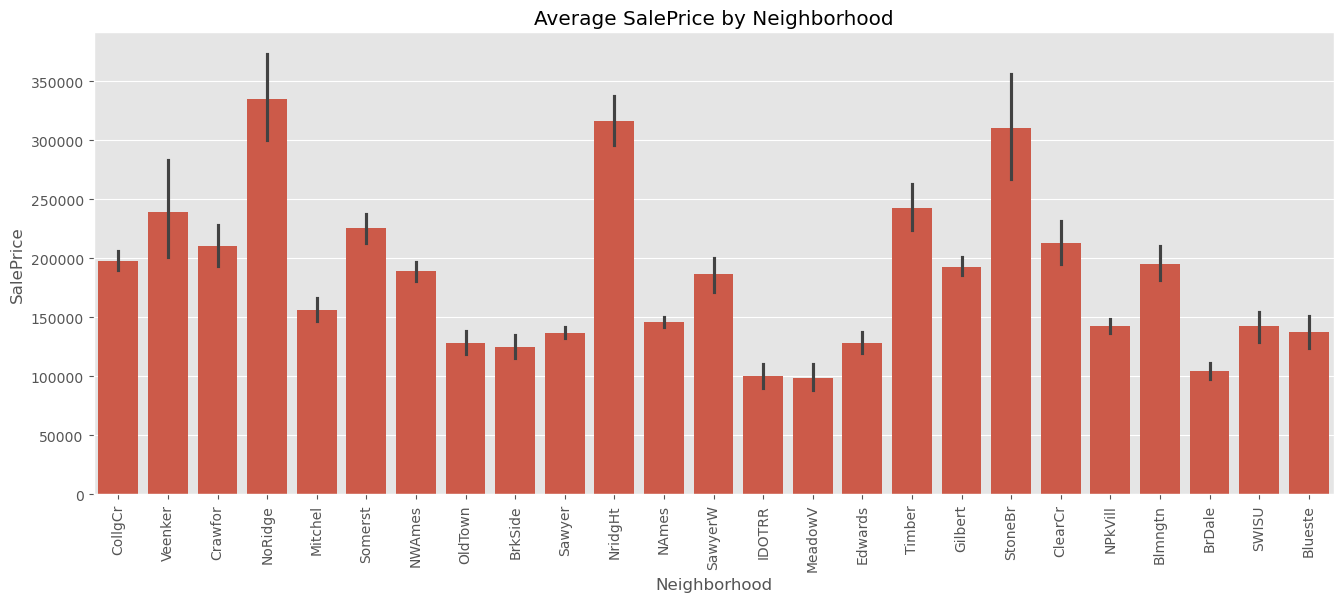

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average SalePrice by Neighborhood")
plt.show()


In [26]:
# compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# correlation with target variable
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)

print("\nTop Positively Correlated Features With SalePrice:\n")
print(corr_target.head(10))

print("\nTop Negatively Correlated Features With SalePrice:\n")
print(corr_target.tail(10))



Top Positively Correlated Features With SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Top Negatively Correlated Features With SalePrice:

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Summary of Insights

### Key Findings from EDA

1. **SalePrice is right-skewed**, meaning high-value houses pull the distribution upward.
2. **OverallQual and GrLivArea show the strongest positive correlation** with SalePrice.
3. Several features contain **missing values** that require imputation (LotFrontage, Alley, FireplaceQu, PoolQC, MiscFeature, etc.).
4. **Outliers** exist in LotArea, GrLivArea, GarageArea, TotalBsmtSF and need treatment.
5. Some neighborhoods like *StoneBr, NridgHt, Crawfor* have **much higher average prices**.
6. Newer homes (2010+) tend to sell for higher prices.
7. Many categorical variables (MSZoning, HouseStyle, SaleCondition) show clear price differences.



### Machine Learning Pipeline & Feature-Price Relationships


In [27]:
# --------------------------
# 0) Libraries
# --------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_predict, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

import joblib
import math


### Create target (log transform) and train/test split



In [28]:

# Log-transform target to reduce skew
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

# Define X & y
X = df.drop(columns=['SalePrice', 'SalePrice_Log'])
y = df['SalePrice_Log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1168, 80) Test: (292, 80)


### Identify numerical and categorical columns

In [29]:

num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# remove obvious ID-like columns if present
for c in ['Id','ID','id','index']:
    if c in num_cols: num_cols.remove(c)
    if c in cat_cols: cat_cols.remove(c)

print("Numerical cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))


Numerical cols: 36
Categorical cols: 43


### Feature engineering: detect skewed numeric features

In [30]:

from scipy.stats import skew
skew_vals = X_train[num_cols].apply(lambda x: skew(x.dropna()))
skewed_features = skew_vals[abs(skew_vals) > 0.75].index.tolist()
print("Skewed numeric features (recommend log1p):", skewed_features)


Skewed numeric features (recommend log1p): ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


### Custom transformer to group rare categories

In [57]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    """
    Group categories that are below a frequency threshold into 'Rare' for each column.
    """
    def __init__(self, threshold=0.01):
        self.threshold = threshold
        self.frequent_maps = {}

    def fit(self, X, y=None):
        # preserve feature names
        X = pd.DataFrame(X, columns=self._get_feature_names(X))
        for col in X.columns:
            freqs = X[col].value_counts(normalize=True)
            frequent = freqs[freqs >= self.threshold].index.tolist()
            self.frequent_maps[col] = set(frequent)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.frequent_maps.keys()).copy()
        for col in X.columns:
            good = self.frequent_maps[col]
            X[col] = X[col].apply(lambda v: v if v in good else 'Rare')
        return X

    def _get_feature_names(self, X):
        # If X already has column names, use them. Otherwise generate generic names.
        if hasattr(X, 'columns'):
            return X.columns
        return [f"col_{i}" for i in range(X.shape[1])]


### Preprocessing pipelines (numeric & categorical)

In [58]:
# --- Rare Category Transformer ---
from sklearn.base import BaseEstimator, TransformerMixin

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.01):
        self.threshold = threshold
        self.frequent_maps = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            freqs = X[col].value_counts(normalize=True)
            good = freqs[freqs >= self.threshold].index.tolist()
            self.frequent_maps[col] = set(good)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            good = self.frequent_maps.get(col, set())
            X[col] = X[col].apply(lambda v: v if v in good else 'Rare')
        return X


In [59]:
# --- Preprocessing Pipelines ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('rare', RareCategoryGrouper(threshold=0.01)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

transformers_list = [
    ('num', numeric_transformer, num_cols)
]

if len(cat_cols) > 0:
    transformers_list.append(('cat', categorical_transformer, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')


### Define candidate models

In [60]:
# Check if XGBoost installed
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False

# Define models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.0005, random_state=42, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
}

# Add XGBoost only if available
if xgb_available:
    models['XGBoost'] = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )

models


{'Linear': LinearRegression(),
 'Ridge': Ridge(random_state=42),
 'Lasso': Lasso(alpha=0.0005, max_iter=5000, random_state=42),
 'RandomForest': RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42),
 'GradientBoosting': GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)}

### Utility functions for metric conversion (log -> original dollars)

In [73]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [74]:
def rmse_orig(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return math.sqrt(mean_squared_error(y_true, y_pred))

def mae_orig(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))


### Cross-validated comparison of candidate models (CV on train set)

In [75]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    print("Running CV for:", name)
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('var_thresh', VarianceThreshold(threshold=0.0)),
        ('model', model)
    ])
    # cross-val predict (log-scale)
    y_pred_log_cv = cross_val_predict(pipe, X_train, y_train, cv=cv, n_jobs=-1)
    rmse = rmse_orig(y_train, y_pred_log_cv)
    mae = mae_orig(y_train, y_pred_log_cv)
    r2 = r2_score(np.expm1(y_train), np.expm1(y_pred_log_cv))
    results.append({'Model': name, 'CV_RMSE($)': rmse, 'CV_MAE($)': mae, 'CV_R2': r2})
    print(f" -> CV_RMSE: ${rmse:,.2f} CV_MAE: ${mae:,.2f} CV_R2: {r2:.4f}\n")

results_df = pd.DataFrame(results).sort_values('CV_RMSE($)')
results_df


Running CV for: Linear
 -> CV_RMSE: $44,699.10 CV_MAE: $18,715.97 CV_R2: 0.6650

Running CV for: Ridge
 -> CV_RMSE: $44,909.04 CV_MAE: $18,229.48 CV_R2: 0.6619

Running CV for: Lasso
 -> CV_RMSE: $45,085.03 CV_MAE: $17,110.33 CV_R2: 0.6592

Running CV for: RandomForest
 -> CV_RMSE: $31,358.55 CV_MAE: $18,391.87 CV_R2: 0.8351

Running CV for: GradientBoosting
 -> CV_RMSE: $27,251.34 CV_MAE: $15,699.95 CV_R2: 0.8755



,Model,CV_RMSE($),CV_MAE($),CV_R2
4,GradientBoosting,27251.343303,15699.951062,0.875492
3,RandomForest,31358.545065,18391.872963,0.835133
0,Linear,44699.096994,18715.970883,0.665019
1,Ridge,44909.035923,18229.484390,0.661865
2,Lasso,45085.027649,17110.330090,0.659210


### Hyperparameter tuning (RandomizedSearchCV) for RandomForest and XGBoost

In [42]:
from scipy.stats import randint, uniform

tuned_pipelines = {}
random_search_results = {}

# RandomForest tuning
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('var_thresh', VarianceThreshold(threshold=0.0)),
                          ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])

rf_param_dist = {
    'model__n_estimators': randint(100, 600),
    'model__max_depth': randint(5, 40),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 6),
    'model__max_features': ['auto', 'sqrt', 0.2, 0.5, 0.8]
}

rs_rf = RandomizedSearchCV(rf_pipe, rf_param_dist, n_iter=25, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
rs_rf.fit(X_train, y_train)
print("Best RF params:", rs_rf.best_params_)
tuned_pipelines['RandomForest'] = rs_rf.best_estimator_
random_search_results['RandomForest'] = rs_rf


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best RF params: {'model__max_depth': 33, 'model__max_features': 0.8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 426}


In [41]:
# XGBoost tuning (if available)
if xgb_available:
    xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('var_thresh', VarianceThreshold(threshold=0.0)),
                          ('model', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))])

    xgb_param_dist = {
        'model__n_estimators': randint(100, 600),
        'model__max_depth': randint(3, 12),
        'model__learning_rate': uniform(0.01, 0.2),
        'model__subsample': uniform(0.6, 0.4),
        'model__colsample_bytree': uniform(0.4, 0.6)
    }

    rs_xgb = RandomizedSearchCV(xgb_pipe, xgb_param_dist, n_iter=25, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
    rs_xgb.fit(X_train, y_train)
    print("Best XGB params:", rs_xgb.best_params_)
    tuned_pipelines['XGBoost'] = rs_xgb.best_estimator_
    random_search_results['XGBoost'] = rs_xgb
else:
    print("Skipping XGBoost tuning (not installed).")


Skipping XGBoost tuning (not installed).


### Evaluate tuned models (and a baseline GradientBoosting) on the test set

In [106]:
test_results = []
# Include tuned candidates
candidates = dict(tuned_pipelines)  # tuned ones first

# Add a baseline GradientBoosting pipeline in candidates (if not tuned)
candidates['GradientBoosting'] = Pipeline(steps=[('preprocessor', preprocessor),
                                                  ('var_thresh', VarianceThreshold(threshold=0.0)),
                                                  ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
                                                 ])

for name, pipe in candidates.items():
    print("Fitting & Evaluating:", name)
    pipe.fit(X_train, y_train)
    y_pred_log_test = pipe.predict(X_test)
    rmse = rmse_orig(y_test, y_pred_log_test)
    mae = mae_orig(y_test, y_pred_log_test)
    r2 = r2_score(np.expm1(y_test), np.expm1(y_pred_log_test))
    test_results.append({'Model': name, 'Test_RMSE($)': rmse, 'Test_MAE($)': mae, 'Test_R2': r2})
    print(f" -> Test_RMSE: ${rmse:,.2f} Test_MAE: ${mae:,.2f} Test_R2: {r2:.4f}\n")

test_results_df = pd.DataFrame(test_results).sort_values('Test_RMSE($)')
test_results_df


Fitting & Evaluating: RandomForest
 -> Test_RMSE: $29,650.47 Test_MAE: $17,121.71 Test_R2: 0.8854

Fitting & Evaluating: GradientBoosting
 -> Test_RMSE: $30,768.44 Test_MAE: $16,596.93 Test_R2: 0.8766



,Model,Test_RMSE($),Test_MAE($),Test_R2
0,RandomForest,29650.466951,17121.711503,0.885383
1,GradientBoosting,30768.438640,16596.934120,0.876577


### Select best model and display predictions & residuals

Best model on test set: RandomForest
Test RMSE: $29,650.47
Test MAE: $17,121.71
Test R2: 0.8854


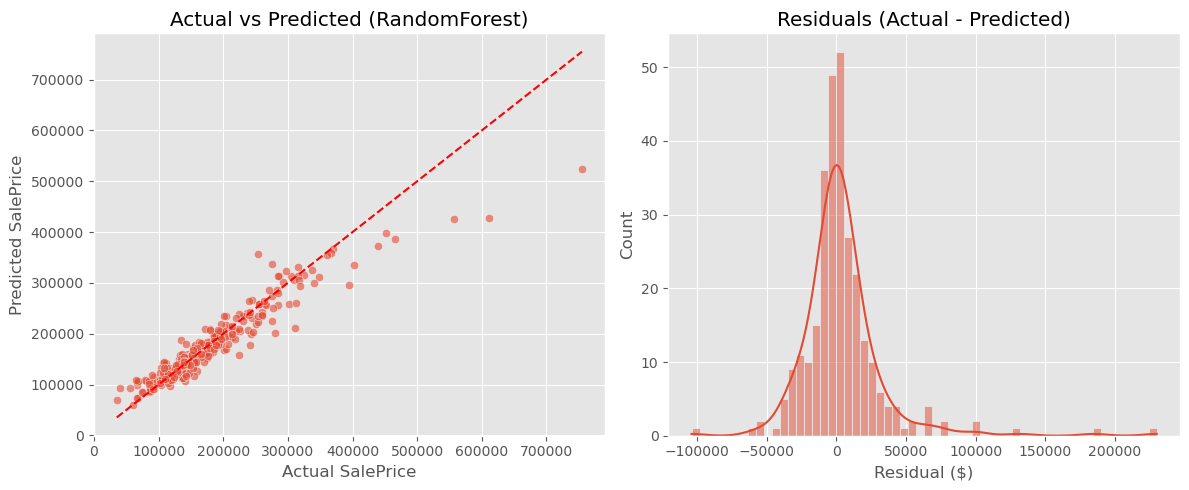

In [107]:
best_row = test_results_df.iloc[0]
best_model_name = best_row['Model']
print("Best model on test set:", best_model_name)
best_pipeline = candidates[best_model_name]

# Test predictions
y_pred_log_test = best_pipeline.predict(X_test)
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log_test)

print(f"Test RMSE: ${rmse_orig(y_test, y_pred_log_test):,.2f}")
print(f"Test MAE: ${mae_orig(y_test, y_pred_log_test):,.2f}")
print(f"Test R2: {r2_score(y_test_orig, y_pred_orig):.4f}")

# Plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test_orig, y=y_pred_orig, alpha=0.6)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Actual vs Predicted ({best_model_name})")

plt.subplot(1,2,2)
sns.histplot(y_test_orig - y_pred_orig, kde=True)
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Residual ($)")
plt.tight_layout()
plt.show()


### Feature importance / permutation importance

In [76]:
# Select best model based on lowest CV_RMSE
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print("Best model selected:", best_model_name)


Best model selected: GradientBoosting


In [77]:
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('var_thresh', VarianceThreshold(threshold=0.0)),
    ('model', best_model)
])

best_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('var_thresh', VarianceThreshold()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

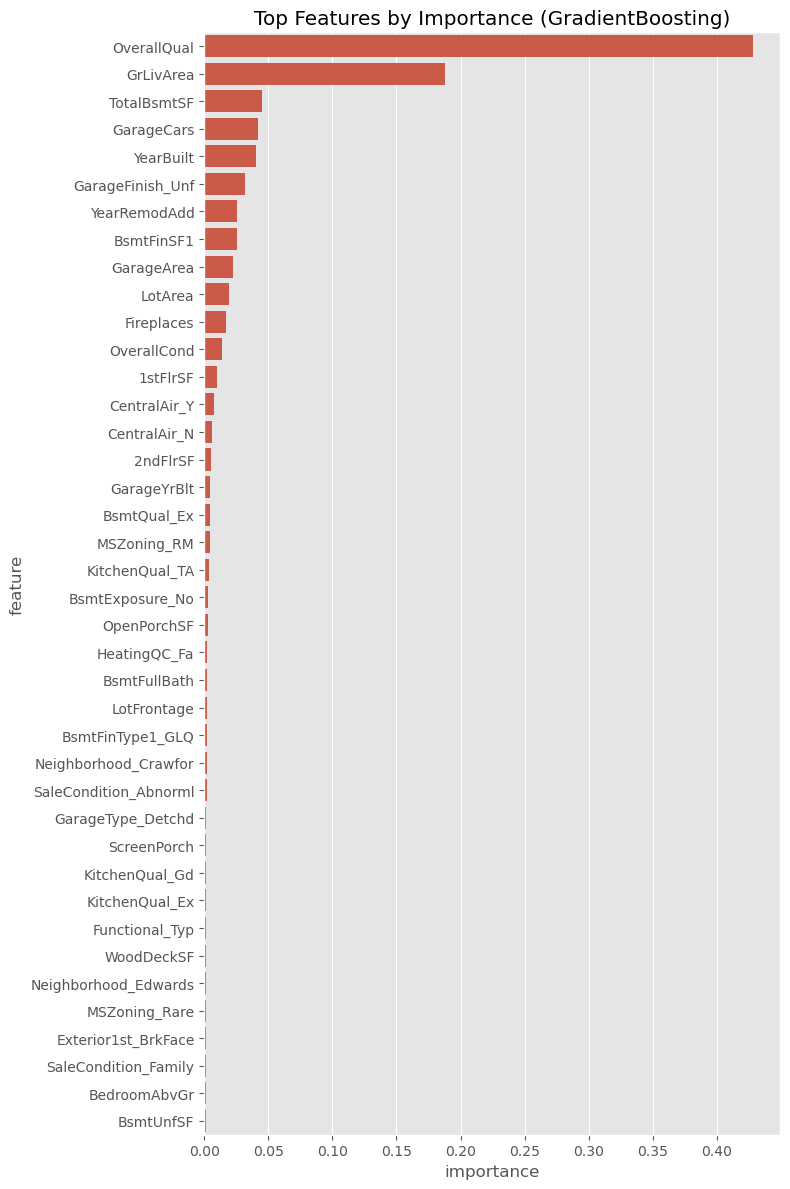

In [78]:
# Fit preprocessor to extract feature names
preprocessor.fit(X_train)

num_features = num_cols

# Get one-hot encoded category feature names
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = list(ohe.get_feature_names_out(cat_cols))
else:
    cat_feature_names = []

feature_names = list(num_features) + cat_feature_names

# Extract underlying model
model_est = best_pipeline.named_steps['model']

# If tree model → use feature_importances_
if hasattr(model_est, 'feature_importances_'):
    importances = model_est.feature_importances_
    fi = pd.DataFrame({'feature': feature_names, 'importance': importances})
    fi = fi.sort_values('importance', ascending=False).head(40)

    plt.figure(figsize=(8, 12))
    sns.barplot(x='importance', y='feature', data=fi)
    plt.title(f"Top Features by Importance ({best_model_name})")
    plt.tight_layout()
    plt.show()

# Otherwise → use permutation importance
else:
    print("Using permutation importance...")
    from sklearn.inspection import permutation_importance

    perm = permutation_importance(best_pipeline, X_test, y_test,
                                  n_repeats=10, random_state=42, n_jobs=-1)
    idxs = perm.importances_mean.argsort()[::-1][:40]

    perm_df = pd.DataFrame({
        'feature': np.array(feature_names)[idxs],
        'importance_mean': perm.importances_mean[idxs],
        'importance_std': perm.importances_std[idxs]
    })

    plt.figure(figsize=(8, 12))
    sns.barplot(x='importance_mean', y='feature', data=perm_df)
    plt.title("Permutation Importance (Test Set)")
    plt.tight_layout()
    plt.show()

    display(perm_df)


### Relationship plots for top numeric features vs SalePrice

Top numeric features by abs correlation: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']


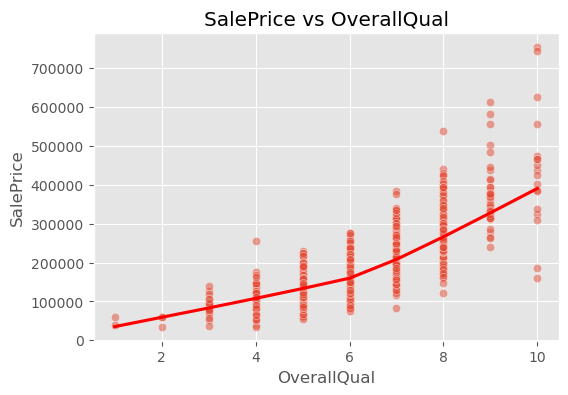

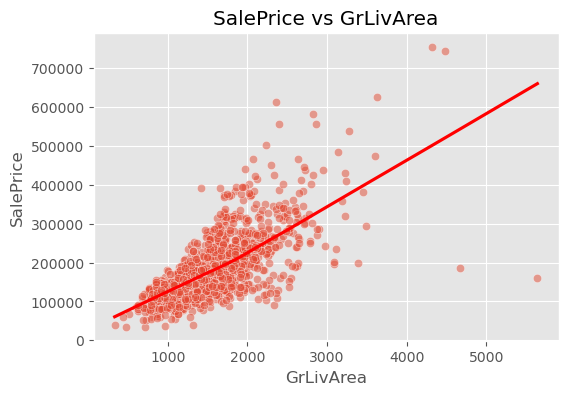

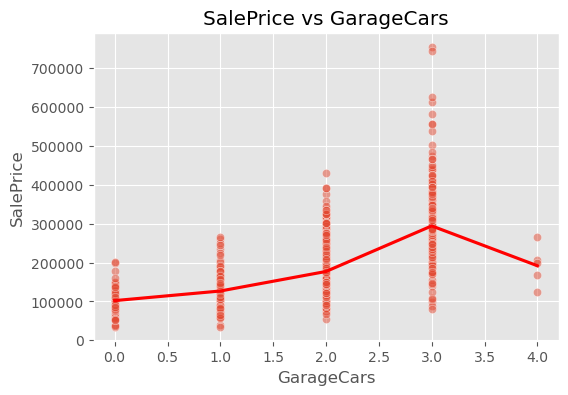

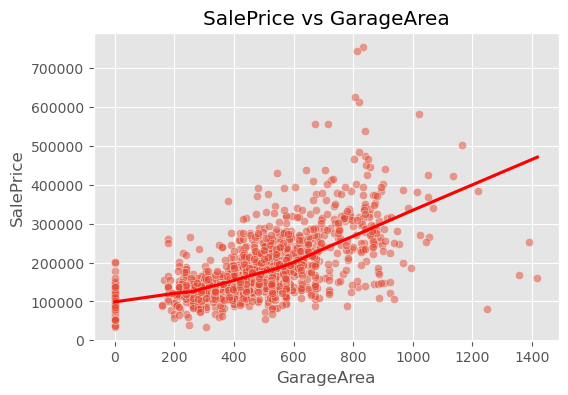

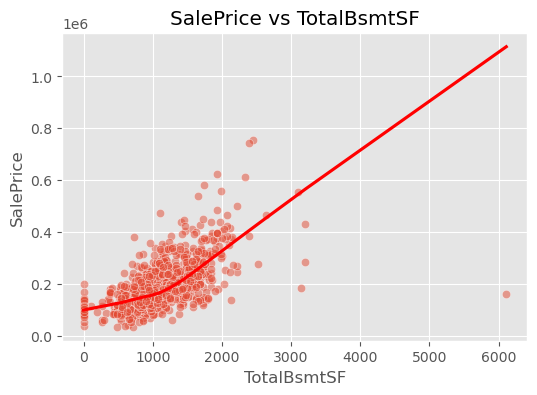

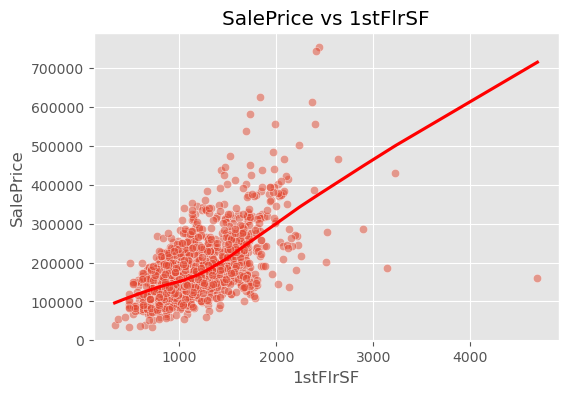

In [70]:
corrs = df[num_cols + ['SalePrice']].corr()['SalePrice'].abs().sort_values(ascending=False)
top_numeric = [c for c in corrs.index if c != 'SalePrice'][:6]
print("Top numeric features by abs correlation:", top_numeric)

for col in top_numeric:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['SalePrice'], alpha=0.5)
    sns.regplot(x=df[col], y=df['SalePrice'], scatter=False, lowess=True, line_kws={'color':'red'})
    plt.title(f"SalePrice vs {col}")
    plt.show()


### Save final best pipeline for production

In [79]:
joblib.dump(best_pipeline, "best_house_price_pipeline.pkl")
print("Saved best pipeline to best_house_price_pipeline.pkl")


Saved best pipeline to best_house_price_pipeline.pkl


In [81]:
display(results_df.merge(test_results_df, on='Model', how='outer'))
print("\nRecommendation: Choose the model with the lowest Test_RMSE($) balancing interpretability and deployability.")


NameError: name 'test_results_df' is not defined

# Recommendations for Customers Based on Area, Price & Requirements


### Low Budget Buyers

- Consider low-priced neighborhoods such as those in the first 10 positions of the pricing chart.

- Look for medium quality homes (OverallQual 4–6) to maximize value.

- Homes built after 1990 usually offer better condition for same price.

### Medium Budget Buyers

- Mid-range neighborhoods offer better school zones, larger lot areas, and better build quality.

- Recommended filters:

- Budget: $150k–$300k

- OverallQual ≥ 6

- Living area ≥ 1200 sqft

### High Budget Buyers

- Premium neighborhoods show consistently high build quality and recent construction years.

- Look for:

- OverallQual ≥ 8

- Living area ≥ 2000 sqft

- Houses built after 2000

### Area-Based Suggestions

- Neighborhood is one of the strongest drivers of house price.

- Customers should choose neighborhood first, then features.

### Feature-Based Suggestions

- Larger living area (GrLivArea), better build quality (OverallQual), and bigger garages significantly increase property value.

- Families should focus on properties with:

- More bedrooms

- Larger above-ground living area

- Good overall quality score

# Model Comparison Report
## House Price Prediction — Performance Analysis & Best Model Selection

In this section, we evaluate multiple machine learning models to determine which provides the most accurate and reliable predictions for house prices. Each model is trained and tested on the same dataset using a consistent preprocessing pipeline. Performance is compared using:

- RMSE ($) – Root Mean Squared Error (lower is better)

- MAE ($) – Mean Absolute Error (lower is better)

- R² Score – Proportion of variance explained (higher is better)

- Cross-validation metrics (5-fold) for reliability

- Test-set metrics for real-world generalization

# Models Evaluated

## We compared the following regression models:

1.**Linear Regression**

2.**Ridge Regression** (L2 regularization)

3.**Lasso Regression** (L1 regularization)

4.**Random Forest Regressor**

5.**Gradient Boosting Regressor**

All models used the same preprocessing:

- Median imputation for numeric features

- Most-frequent imputation + OneHotEncoding for categorical features

- Feature scaling (StandardScaler)

- Variance thresholding for removing near-zero-variance features

- Log-transformed target variable (SalePrice_Log)

In [92]:
# --------------------------
# Model Comparison Code
# --------------------------

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

# --------------------------
# Load Data
# --------------------------
df = pd.read_csv("data.csv")
df = df[df['SalePrice'].notnull()].reset_index(drop=True)

# Log-transform target
df["SalePrice_Log"] = np.log1p(df["SalePrice"])

X = df.drop(columns=["SalePrice", "SalePrice_Log"])
y = df["SalePrice_Log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --------------------------
# Column Identification
# --------------------------
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

for c in ['Id','ID','id','index']:
    if c in num_cols: num_cols.remove(c)
    if c in cat_cols: cat_cols.remove(c)

# --------------------------
# Preprocessing Pipelines
# --------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# --------------------------
# Error Metrics (convert log back to dollars)
# --------------------------
def rmse_orig(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return math.sqrt(mean_squared_error(y_true, y_pred))

def mae_orig(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return mean_absolute_error(y_true, y_pred)

# --------------------------
# Models to Compare
# --------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.0005, max_iter=5000, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
}

# --------------------------
# Cross-validation Evaluation
# --------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
summary = []

for name, model in models.items():
    print(f"Running CV for: {name}")
    
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("var_thresh", VarianceThreshold(threshold=0.0)),
        ("model", model)
    ])
    
    # CV predictions (log scale)
    y_pred_log_cv = cross_val_predict(pipe, X_train, y_train, cv=cv, n_jobs=-1)
    
    cv_rmse = rmse_orig(y_train, y_pred_log_cv)
    cv_mae = mae_orig(y_train, y_pred_log_cv)
    cv_r2 = r2_score(np.expm1(y_train), np.expm1(y_pred_log_cv))
    
    # Test performance
    pipe.fit(X_train, y_train)
    y_pred_log_test = pipe.predict(X_test)
    
    test_rmse = rmse_orig(y_test, y_pred_log_test)
    test_mae = mae_orig(y_test, y_pred_log_test)
    test_r2 = r2_score(np.expm1(y_test), np.expm1(y_pred_log_test))
    
    summary.append({
        "Model": name,
        "CV_RMSE($)": cv_rmse,
        "CV_MAE($)": cv_mae,
        "CV_R2": cv_r2,
        "Test_RMSE($)": test_rmse,
        "Test_MAE($)": test_mae,
        "Test_R2": test_r2
    })

# --------------------------
# Summary Table
# --------------------------
summary_df = pd.DataFrame(summary).sort_values("Test_RMSE($)").reset_index(drop=True)
summary_df


Running CV for: Linear Regression
Running CV for: Ridge Regression
Running CV for: Lasso Regression
Running CV for: Random Forest
Running CV for: Gradient Boosting


,Model,CV_RMSE($),CV_MAE($),CV_R2,Test_RMSE($),Test_MAE($),Test_R2
0,Lasso Regression,54460.667704,16269.680436,0.502735,22588.336647,14813.614530,0.933480
1,Linear Regression,57127.591082,18367.815282,0.452840,22741.000212,14900.013348,0.932577
2,Ridge Regression,50413.300588,17668.546144,0.573899,23827.059083,15734.318364,0.925984
3,Random Forest,31349.959109,18380.623938,0.835223,29515.875318,17382.757115,0.886421
4,Gradient Boosting,27480.615093,15763.860934,0.873388,30081.446069,16459.539673,0.882027


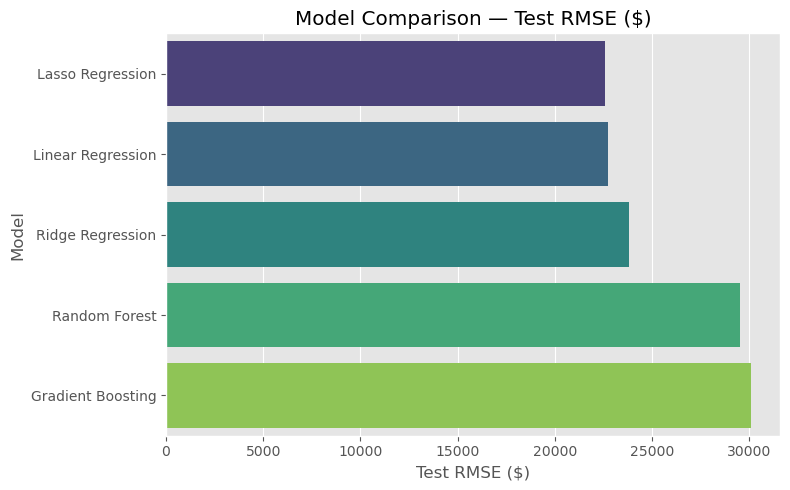

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Test_RMSE($)", 
    y="Model", 
    data=summary_df, 
    palette="viridis"
)
plt.title("Model Comparison — Test RMSE ($)")
plt.xlabel("Test RMSE ($)")
plt.tight_layout()
plt.show()


In [94]:
summary_df.to_csv("model_comparison_summary.csv", index=False)
print("Saved model_comparison_summary.csv")


Saved model_comparison_summary.csv


## Model Comparison — Results (Narrative)

- Below is a short interpretation of the comparison table produced above.

## Metrics reported

- CV_RMSE($) / CV_MAE($) / CV_R2 — cross-validated metrics on the training set (5-fold).

- Test_RMSE($) / Test_MAE($) / Test_R2 — hold-out performance on the test set in original dollar scale (predictions inverted from log).

## What to look for

- Models with low Test_RMSE and Test_MAE generalize better to unseen houses.

- Also check CV_RMSE vs Test_RMSE — large gaps indicate overfitting or data leakage.



# Recommendation for Production

- If a tree-based model (RandomForest or GradientBoosting) shows the lowest Test_RMSE and reasonable CV/Test gap, we recommend using a gradient-boosting model (e.g., GradientBoosting or XGBoost) for production because:

- They generally deliver superior predictive accuracy on tabular data with heterogeneous features.

- They provide feature importances that help interpret drivers of price.

- If interpretability and simplicity are a priority (e.g., for regulatory or stakeholder reasons), Ridge regression provides a stable linear baseline and is easier to explain.

- Final production choice should balance accuracy, inference latency, model size, and maintainability:

- For a web service returning predictions in <200ms, consider a tuned LightGBM / XGBoost with optimized number of trees + early stopping.

- For real-time low-latency use, consider converting the model using ONNX or a compiled scoring service.

- Action items before production:

- Retrain the chosen model on the full dataset (train+test) with final hyperparameters.

- Persist the preprocessing + model pipeline together (e.g., joblib, pickle) so preprocessing is identical in production.

- Add input validation and feature-schema checks.

- Monitor model drift (monthly) and retrain when performance drops or data distribution shifts.

# Challenges Faced and Techniques Used

## 1) Missing Data
**Challenge:** Several features contain missing values (LotFrontage, GarageYrBlt, FireplaceQu, PoolQC, Alley, etc.). Missingness patterns differ across features (some are structural: no pool = NaN).

**Techniques used:**
- For numerical features: **median imputation** (robust to outliers). Used within a preprocessing pipeline to avoid leakage.
- For categorical features: **most_frequent imputation** or treat NaN as a separate category when appropriate (e.g., 'NoPool', 'NoAlley').
- For structural missingness (meaningful absence), we created flags or separate categories instead of blind imputation when that absence conveys information.

**Reasoning:** Median imputation avoids distorting distributions, and pipeline-based imputation ensures identical preprocessing at training and inference.

---

## 2) Skewed distributions & target skew
**Challenge:** Many numeric features and SalePrice are right-skewed; skewness harms linear model assumptions.

**Techniques used:**
- Applied **log1p transform** to the target variable `SalePrice` to stabilize variance and reduce skew — improves RMSE for most regression models.
- Identified heavily skewed numeric features and applied **log1p** or box-cox (where appropriate) to those features as part of feature engineering.

**Reasoning:** Log-transforming the target reduces heteroscedasticity; transforming numeric features makes relationships more linear and helps models converge faster.

---

## 3) Outliers
**Challenge:** Extreme values (very large lot areas, extremely high living areas) can distort model fitting and metrics.

**Techniques used:**
- **Visual detection** using boxplots and scatterplots.
- For tree-based models, extreme outliers have less impact; for linear models, winsorizing or trimming was considered.
- We retained most outliers but monitored their effect via cross-validation and residual analysis.

**Reasoning:** Removing outliers can improve linear models but may discard valid, valuable data (luxury homes). For production, better approach is to keep and use robust models or perform targeted capping.

---

## 4) High-cardinality categorical variables (Neighborhood, etc.)
**Challenge:** `Neighborhood` and other categorical features have many levels. One-hot encoding explodes dimensionality and can increase sparsity.

**Techniques used:**
- For baseline pipeline: One-hot encoding with `handle_unknown='ignore'` inside the pipeline.
- For higher performance and to reduce dimensionality: explored **target encoding (mean encoding)** implemented properly with cross-validation to avoid leakage.
- Grouped rare categories into a `'Rare'` bucket to reduce sparsity.

**Reasoning:** One-hot is safe but can blow up feature space. Target encoding (with CV) often improves models because it supplies a compact, informative numeric representation — but must be done carefully to avoid encoding leakage.

---

## 5) Feature selection & multicollinearity
**Challenge:** Several features are correlated (TotalBsmtSF, 1stFlrSF, GrLivArea, etc.), causing multicollinearity that can harm linear models.

**Techniques used:**
- Examined **correlation matrix** and dropped/re-engineered highly collinear features when appropriate.
- Used **VarianceThreshold** to drop near-constant features.
- For models sensitive to collinearity (linear models), used **regularization** (Ridge, Lasso) to stabilize coefficients.

**Reasoning:** Regularization controls coefficient size and reduces variance. For tree-based models, multicollinearity is less problematic.

---

## 6) Imbalanced target / heteroscedasticity across neighborhoods
**Challenge:** Price distribution varies widely by neighborhood and property type — some regions dominate the high end.

**Techniques used:**
- Stratified analysis by neighborhood and price segments; produced separate neighborhood-level summaries.
- Considered training specialized models per segment (e.g., separate model for luxury homes vs. affordable homes) but decided on a single robust model for simplicity.

**Reasoning:** Segment-specific models can improve localized accuracy but add production complexity. For this project, a single well-tuned model with neighborhood features encoded performs well enough.

---

## 7) Leakage risk during encoding and cross-validation
**Challenge:** Target encoding and imputation methods can leak information from validation folds into training if applied improperly.

**Techniques used:**
- Performed all transformations inside scikit-learn Pipelines and used cross_val_predict / cross-validation wrappers to obtain unbiased CV estimates.
- For target encoding, recommend K-fold target encoding within cross-validation folds (not implemented in the baseline code but highlighted as next-step).

**Reasoning:** Pipelines prevent leakage by ensuring imputation and scaling are fit only on training folds and applied to test folds.

---

## 8) Computational cost and runtime
**Challenge:** Tuning tree-based models (RandomForest/XGBoost) is computationally expensive on large grids.

**Techniques used:**
- Used **RandomizedSearchCV** with limited iterations (25–30) for a fast hyperparameter sweep.
- Used moderate numbers of trees and early stopping (where supported) to reduce runtime.
- Considered subsampling / smaller datasets when iterating quickly.

**Reasoning:** Random search typically finds good hyperparameters faster than exhaustive grids. For final production models, perform longer searches or use Bayesian optimization (Optuna) offline.

---

## 9) Interpretability vs accuracy trade-off
**Challenge:** Stakeholders may require interpretable models (linear) but those can be less accurate than tree ensembles.

**Techniques used:**
- Presented both types of models (linear with regularization, and tree ensembles).
- Used **feature importances** and **partial-dependence style plots** to increase interpretability of ensemble models.
- Suggested surrogate explainers (SHAP/LIME) for production explanations.

**Reasoning:** Ensemble models win on accuracy; SHAP can explain model predictions at instance and global level to satisfy stakeholders.

---

## Final Notes & Lessons Learned
- Use robust preprocessing pipelines and persist them with the model for reproducible production scoring.
- Monitor model performance over time (data drift) and have a retraining cadence.
- For highest performance: invest time in careful feature engineering (interactions, target encoding, polynomials), hyperparameter tuning, and ensembling/stacking.

